# Install all packages that we need

In [5]:
# %pip install matplotlib mplsoccer pandas numpy requests
# %pip freeze > requirements.txt

# importing them

In [1]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests

# Connect to the database

In [ ]:
# load all match data
events = requests.get("https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/3906390.json")
events = events.json()
# events

# Transform data to a Dataframe

In [3]:
df = json_normalize(events)
pd.set_option('display.max_columns', None)
# df.head()

# filter out necessary data

In [4]:
spain_passes = df.loc[(df['type.name'] == 'Pass') & (df['possession_team.name'] == "Spain Women's")]
# spain_passes.tail()

# Draw a Pitch

In [ ]:
fig, ax = plt.subplots(figsize=(16, 11))
pitch = Pitch(pitch_type='statsbomb', positional=True, pitch_color='grass', line_color='white', goal_type='box',
              stripe=True)  # optional stripes
pitch.draw(ax=ax)

# Create pass Map

In [ ]:
fig, ax = plt.subplots(figsize=(16, 11))
pitch = Pitch(pitch_type='statsbomb', positional=True, pitch_color='grass', line_color='white', goal_type='box',
              stripe=True)  # optional stripes
pitch.draw(ax=ax)

for x in range(len(spain_passes['id'])):
    # we can choose period 1,2 or both
    if spain_passes['period'].iloc[x] == 1 or spain_passes['period'].iloc[x] == 2:

        if any([spain_passes['pass.outcome.name'].iloc[x] == 'Incomplete', spain_passes['pass.outcome.name'].iloc[x] == 'Out',
                spain_passes['pass.outcome.name'].iloc[x] == 'Unknown', spain_passes['pass.outcome.name'].iloc[x] == 'Pass Offside',
                spain_passes['pass.outcome.name'].iloc[x] == 'Injury Clearance']):
            pitch.arrows(spain_passes['location'].iloc[x][0], spain_passes['location'].iloc[x][1],
                         spain_passes['pass.end_location'].iloc[x][0], spain_passes['pass.end_location'].iloc[x][1],
                         ax=ax, color='red', width=2, headwidth=10, headlength=10, label='Unsuccessful Pass')
        else:
            pitch.arrows(spain_passes['location'].iloc[x][0], spain_passes['location'].iloc[x][1],
                        spain_passes['pass.end_location'].iloc[x][0], spain_passes['pass.end_location'].iloc[x][1],
                        ax=ax, color='blue', width=2, headwidth=10, headlength=10, label='Successful Pass')
plt.title('Spain Passes', color='black', fontsize=20)
# add bar to indicate passes as successful pass and unsuccessful pass
plt.xlabel('Pitch Length', color='black', fontsize=15)
plt.ylabel('Pitch Width', color='black', fontsize=15)
# plt.legend()
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(16, 11))
pitch = Pitch(pitch_type='statsbomb', positional=True, pitch_color='grass', line_color='white', goal_type='box',
              stripe=True)  # optional stripes
pitch.draw(ax=ax)

for x in range(len(spain_passes['id'])):
    # we can choose period 1,2 or both
    if (spain_passes['period'].iloc[x] == 2 or spain_passes['period'].iloc[x] == 1) and (spain_passes['player.id'].iloc[x] == 49836.0):

        if any([spain_passes['pass.outcome.name'].iloc[x] == 'Incomplete', spain_passes['pass.outcome.name'].iloc[x] == 'Out',
                spain_passes['pass.outcome.name'].iloc[x] == 'Unknown', spain_passes['pass.outcome.name'].iloc[x] == 'Pass Offside',
                spain_passes['pass.outcome.name'].iloc[x] == 'Injury Clearance']):
            pitch.arrows(spain_passes['location'].iloc[x][0], spain_passes['location'].iloc[x][1],
                         spain_passes['pass.end_location'].iloc[x][0], spain_passes['pass.end_location'].iloc[x][1],
                         ax=ax, color='red', width=2, headwidth=10, headlength=10, label='Unsuccessful Pass')
        else:
            pitch.arrows(spain_passes['location'].iloc[x][0], spain_passes['location'].iloc[x][1],
                        spain_passes['pass.end_location'].iloc[x][0], spain_passes['pass.end_location'].iloc[x][1],
                        ax=ax, color='blue', width=2, headwidth=10, headlength=10, label='Successful Pass')
plt.title('Olga Carmona García Passes', color='black', fontsize=20)
# add bar to indicate passes as successful pass and unsuccessful pass
plt.xlabel('Pitch Length', color='black', fontsize=15)
plt.ylabel('Pitch Width', color='black', fontsize=15)
# plt.legend()
plt.show()


### Olga Carmona García's true passes and false passes

In [ ]:
(spain_passes['player.id'] == 49836).value_counts()

player.id
False    459
True      75
Name: count, dtype: int64

In [31]:
(spain_passes['player.id'] == 49836).value_counts(True)


player.id
False    0.859551
True     0.140449
Name: proportion, dtype: float64

# Create a Shots Map

In [ ]:
spain_shots = df.loc[(df['type.name'] == 'Shot') & (df['possession_team.name'] == "Spain Women's")]
# spain_shots.tail()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 11))
pitch = Pitch(pitch_type='statsbomb', positional=True, pitch_color='grass', line_color='white', goal_type='box',
              stripe=True)  # optional stripes
pitch.draw(ax=ax)

for x in range(len(spain_shots)):
    # we can choose period 1,2 or both
    if (spain_shots['period'].iloc[x] == 1 or spain_shots['period'].iloc[x] == 2):
        # size of scatter will depend on xG
        size = np.sqrt(spain_shots['shot.statsbomb_xg'].iloc[x]) * 200
        if spain_shots['shot.outcome.name'].iloc[x] == 'Goal':
            pitch.arrows(spain_shots['location'].iloc[x][0], spain_shots['location'].iloc[x][1],
                         spain_shots['shot.end_location'].iloc[x][0], spain_shots['shot.end_location'].iloc[x][1],
                         ax=ax, color='blue', width=2, headwidth=10, headlength=10, label='Goal')
        else:
            pitch.arrows(spain_shots['location'].iloc[x][0], spain_shots['location'].iloc[x][1],
                         spain_shots['shot.end_location'].iloc[x][0], spain_shots['shot.end_location'].iloc[x][1],
                         ax=ax, color='red', width=2, headwidth=10, headlength=10, label='Miss')
        

plt.title('Spain Shots', color='black', fontsize=20)
# add bar to indicate passes as successful pass and unsuccessful pass
plt.xlabel('Pitch Length', color='black', fontsize=15)
plt.ylabel('Pitch Width', color='black', fontsize=15)
# plt.legend()
plt.show()


# Create Possession Chart

In [ ]:
import copy

poss_test = copy.copy(df)
# poss_test.head()

In [ ]:
# inverting possession duration for the opposite team (making it negative)

for x in range(len(poss_test['index'])):
    if (poss_test['possession_team.id'].iloc[x] == 865):
        poss_test.duration.iloc[x] = poss_test.duration.iloc[x] * -1

In [ ]:
# poss_test.head()

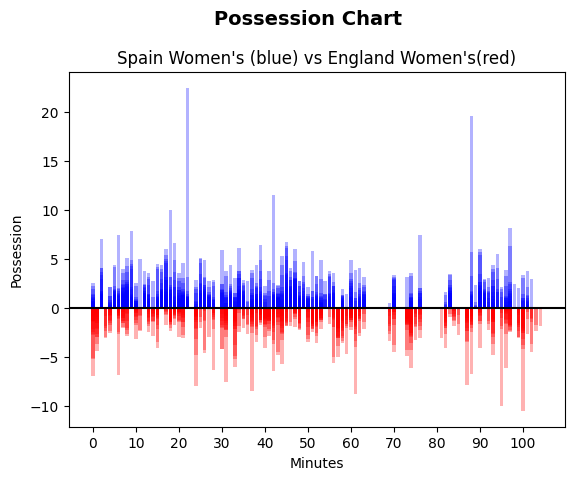

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

fig.suptitle('Possession Chart', fontsize=14, fontweight='bold')
ax.set_title(df['team.name'][0] + ' (blue)' + ' vs ' + df['team.name'][1] + '(red)')

ax.set_xlabel('Minutes')
ax.set_ylabel('Possession')

plt.bar(poss_test.minute, poss_test.duration, color=np.where(poss_test.duration>0, 'b', 'r'), alpha=0.3)

plt.axhline(0, color='black')

tot_min = poss_test.minute.max()
plt.xticks(np.arange(0, tot_min, step=10))
plt.show()
